**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRES Y MATRÍCULAS:

-Daniela Gómez Escamilla A01795312

-Francisco Antonio Enríquez Cabrera A01795006

-Juan Manuel Carballo Montaño A01166758

-Kurt Damián Yáñez Badelt A00394053

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/Ciencia y Analítica de Datos/Semana 9"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, FunctionTransformer

In [ ]:
data_df = pd.read_csv('cancer_breast.csv', index_col='id')

# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [ ]:
data_df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720




1a) Estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
data_df.describe(include='object').T

,count,unique,top,freq
diagnosis,569,2,B,357


1b) Valores únicos por variable para identificar posibles variables categóricas.

In [ ]:
data_df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

1c) Búsqueda de valores faltantes.

In [ ]:
data_df.isna().mean() * 100

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

[Text(0, 0, '212'), Text(0, 0, '357')]

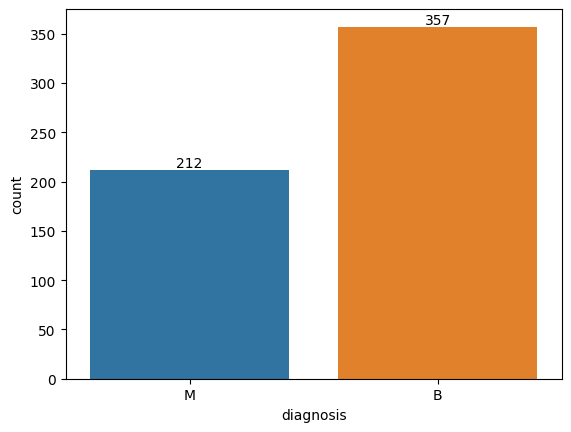

In [ ]:
ax = sns.countplot(data_df, x='diagnosis')
ax.bar_label(ax.containers[0])

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

<Axes: >

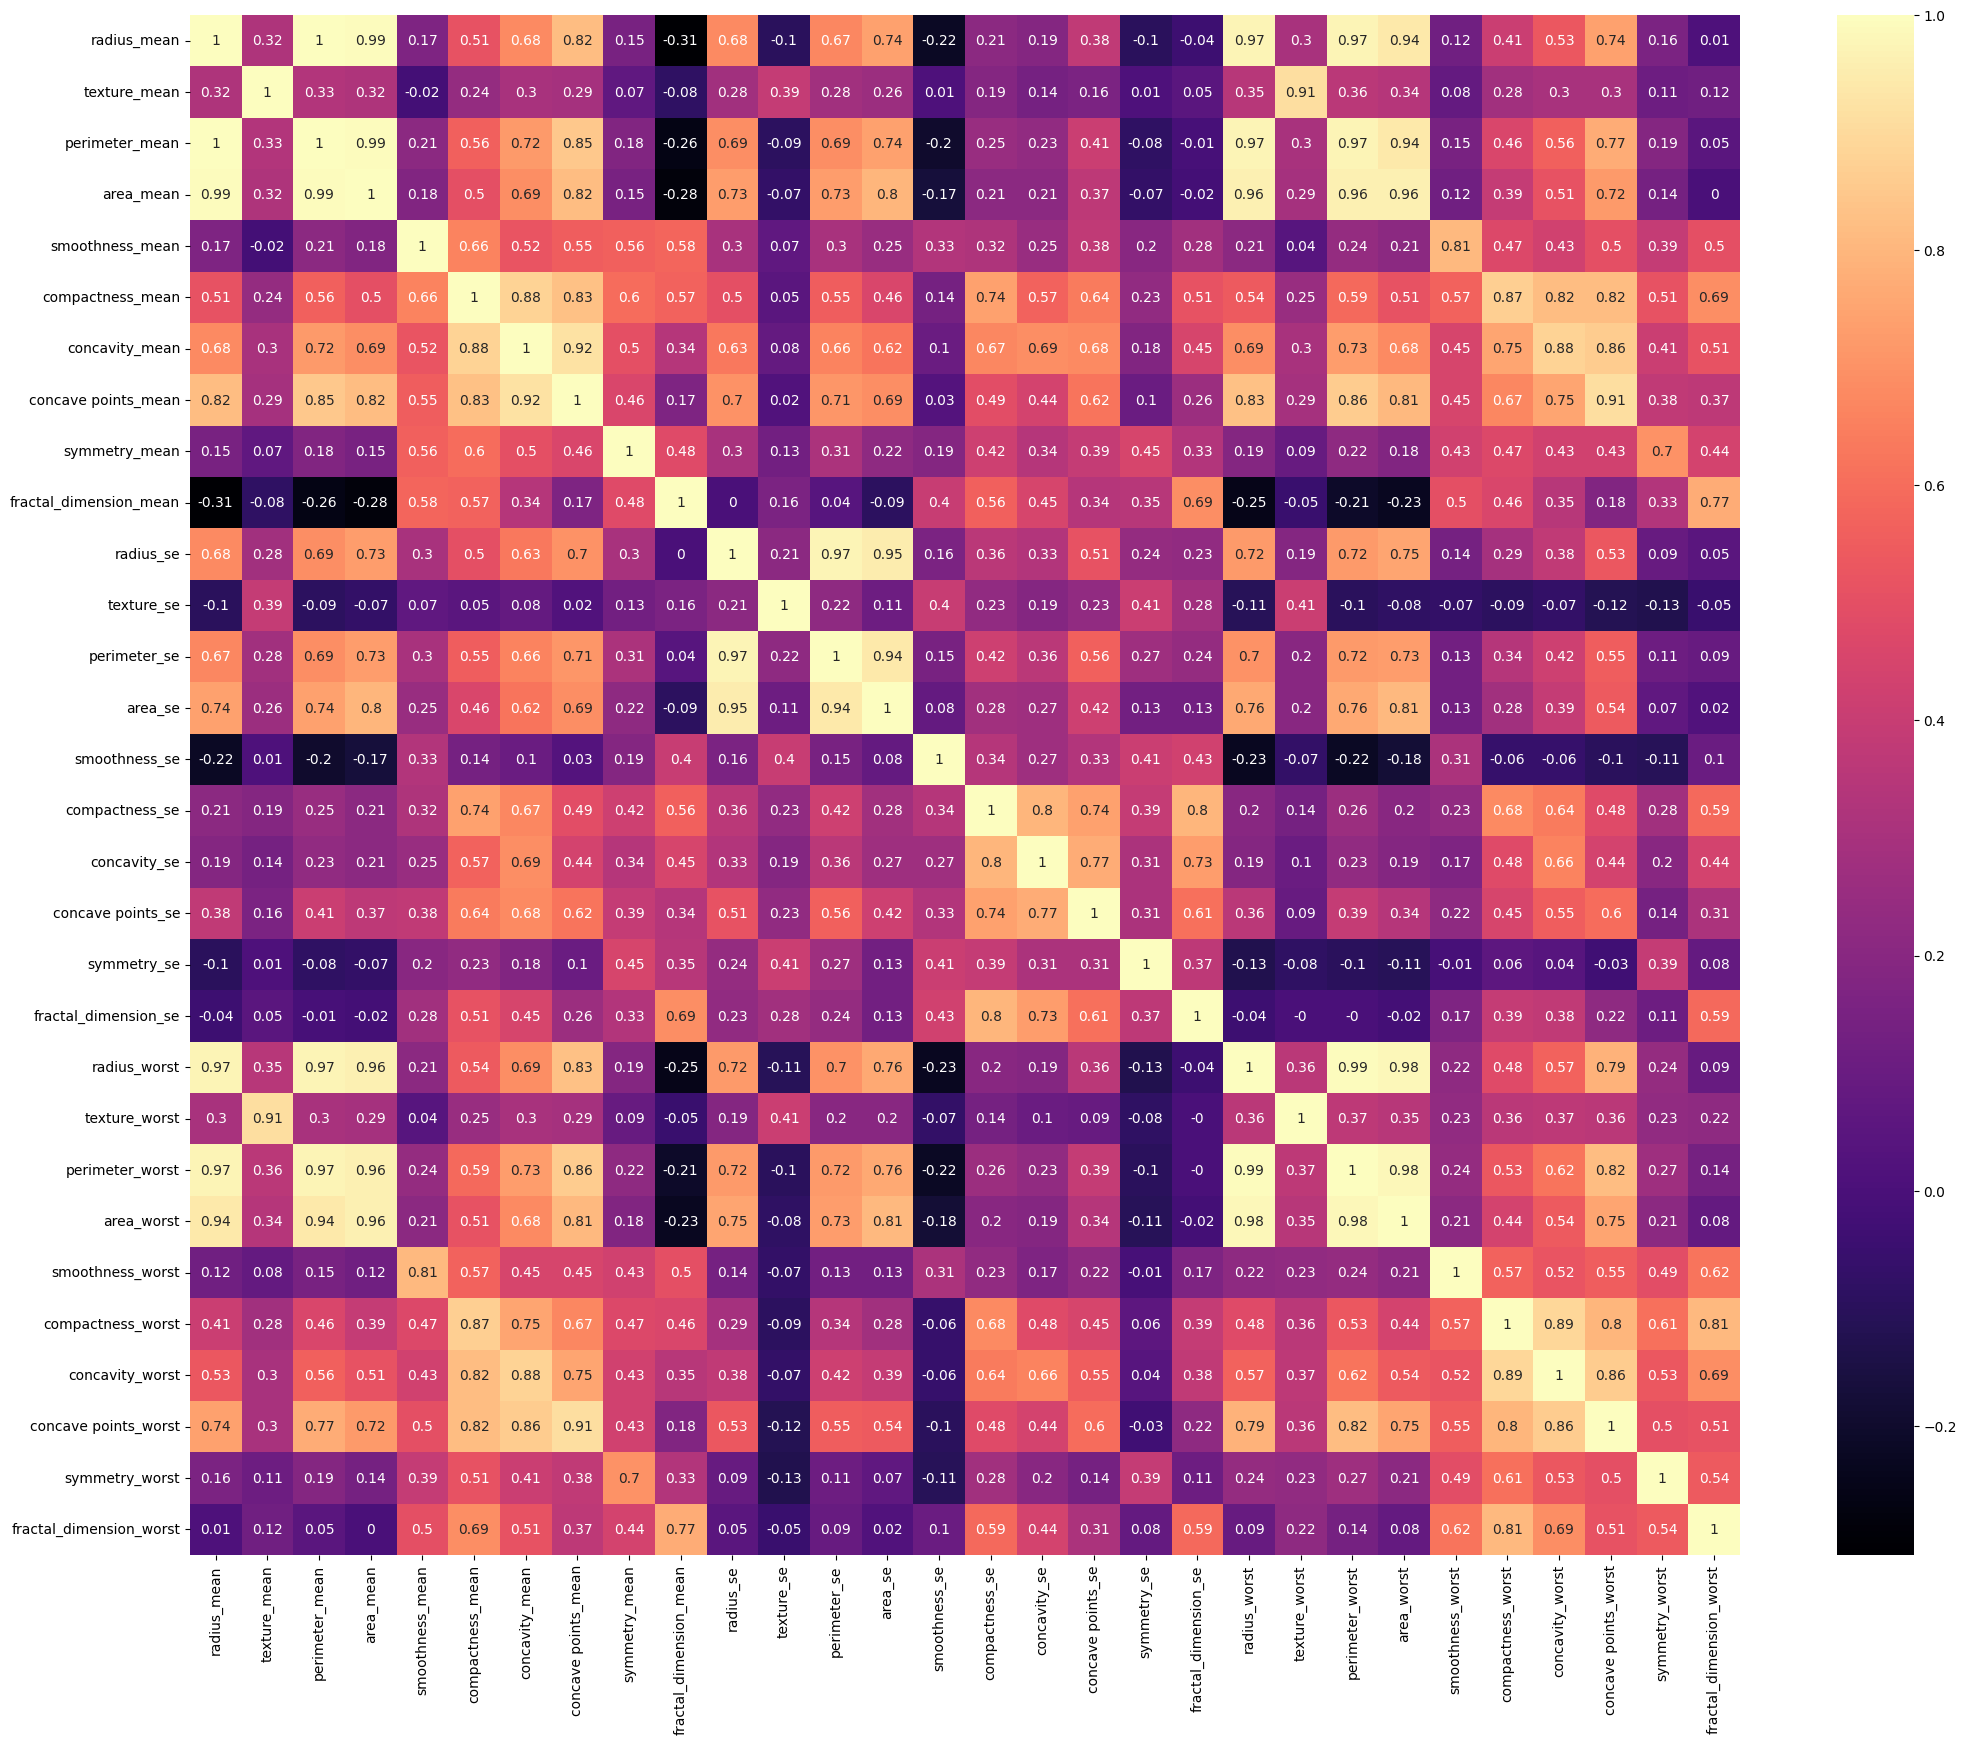

In [ ]:
plt.figure(figsize = (25, 20))
corr_df = round(data_df.select_dtypes(include=['number']).corr(method='pearson', numeric_only=True), 2)
sns.heatmap(corr_df, annot=True, cmap='magma')

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

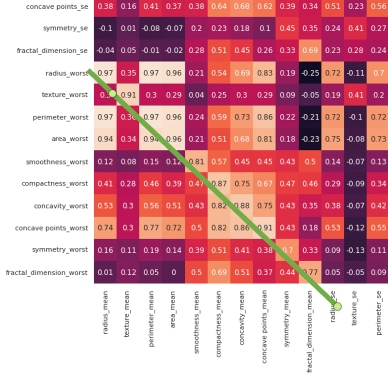

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [ ]:
worst_cols = list(data_df.filter(regex='_worst'))
data_df.drop(worst_cols, axis=1, inplace=True)
data_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




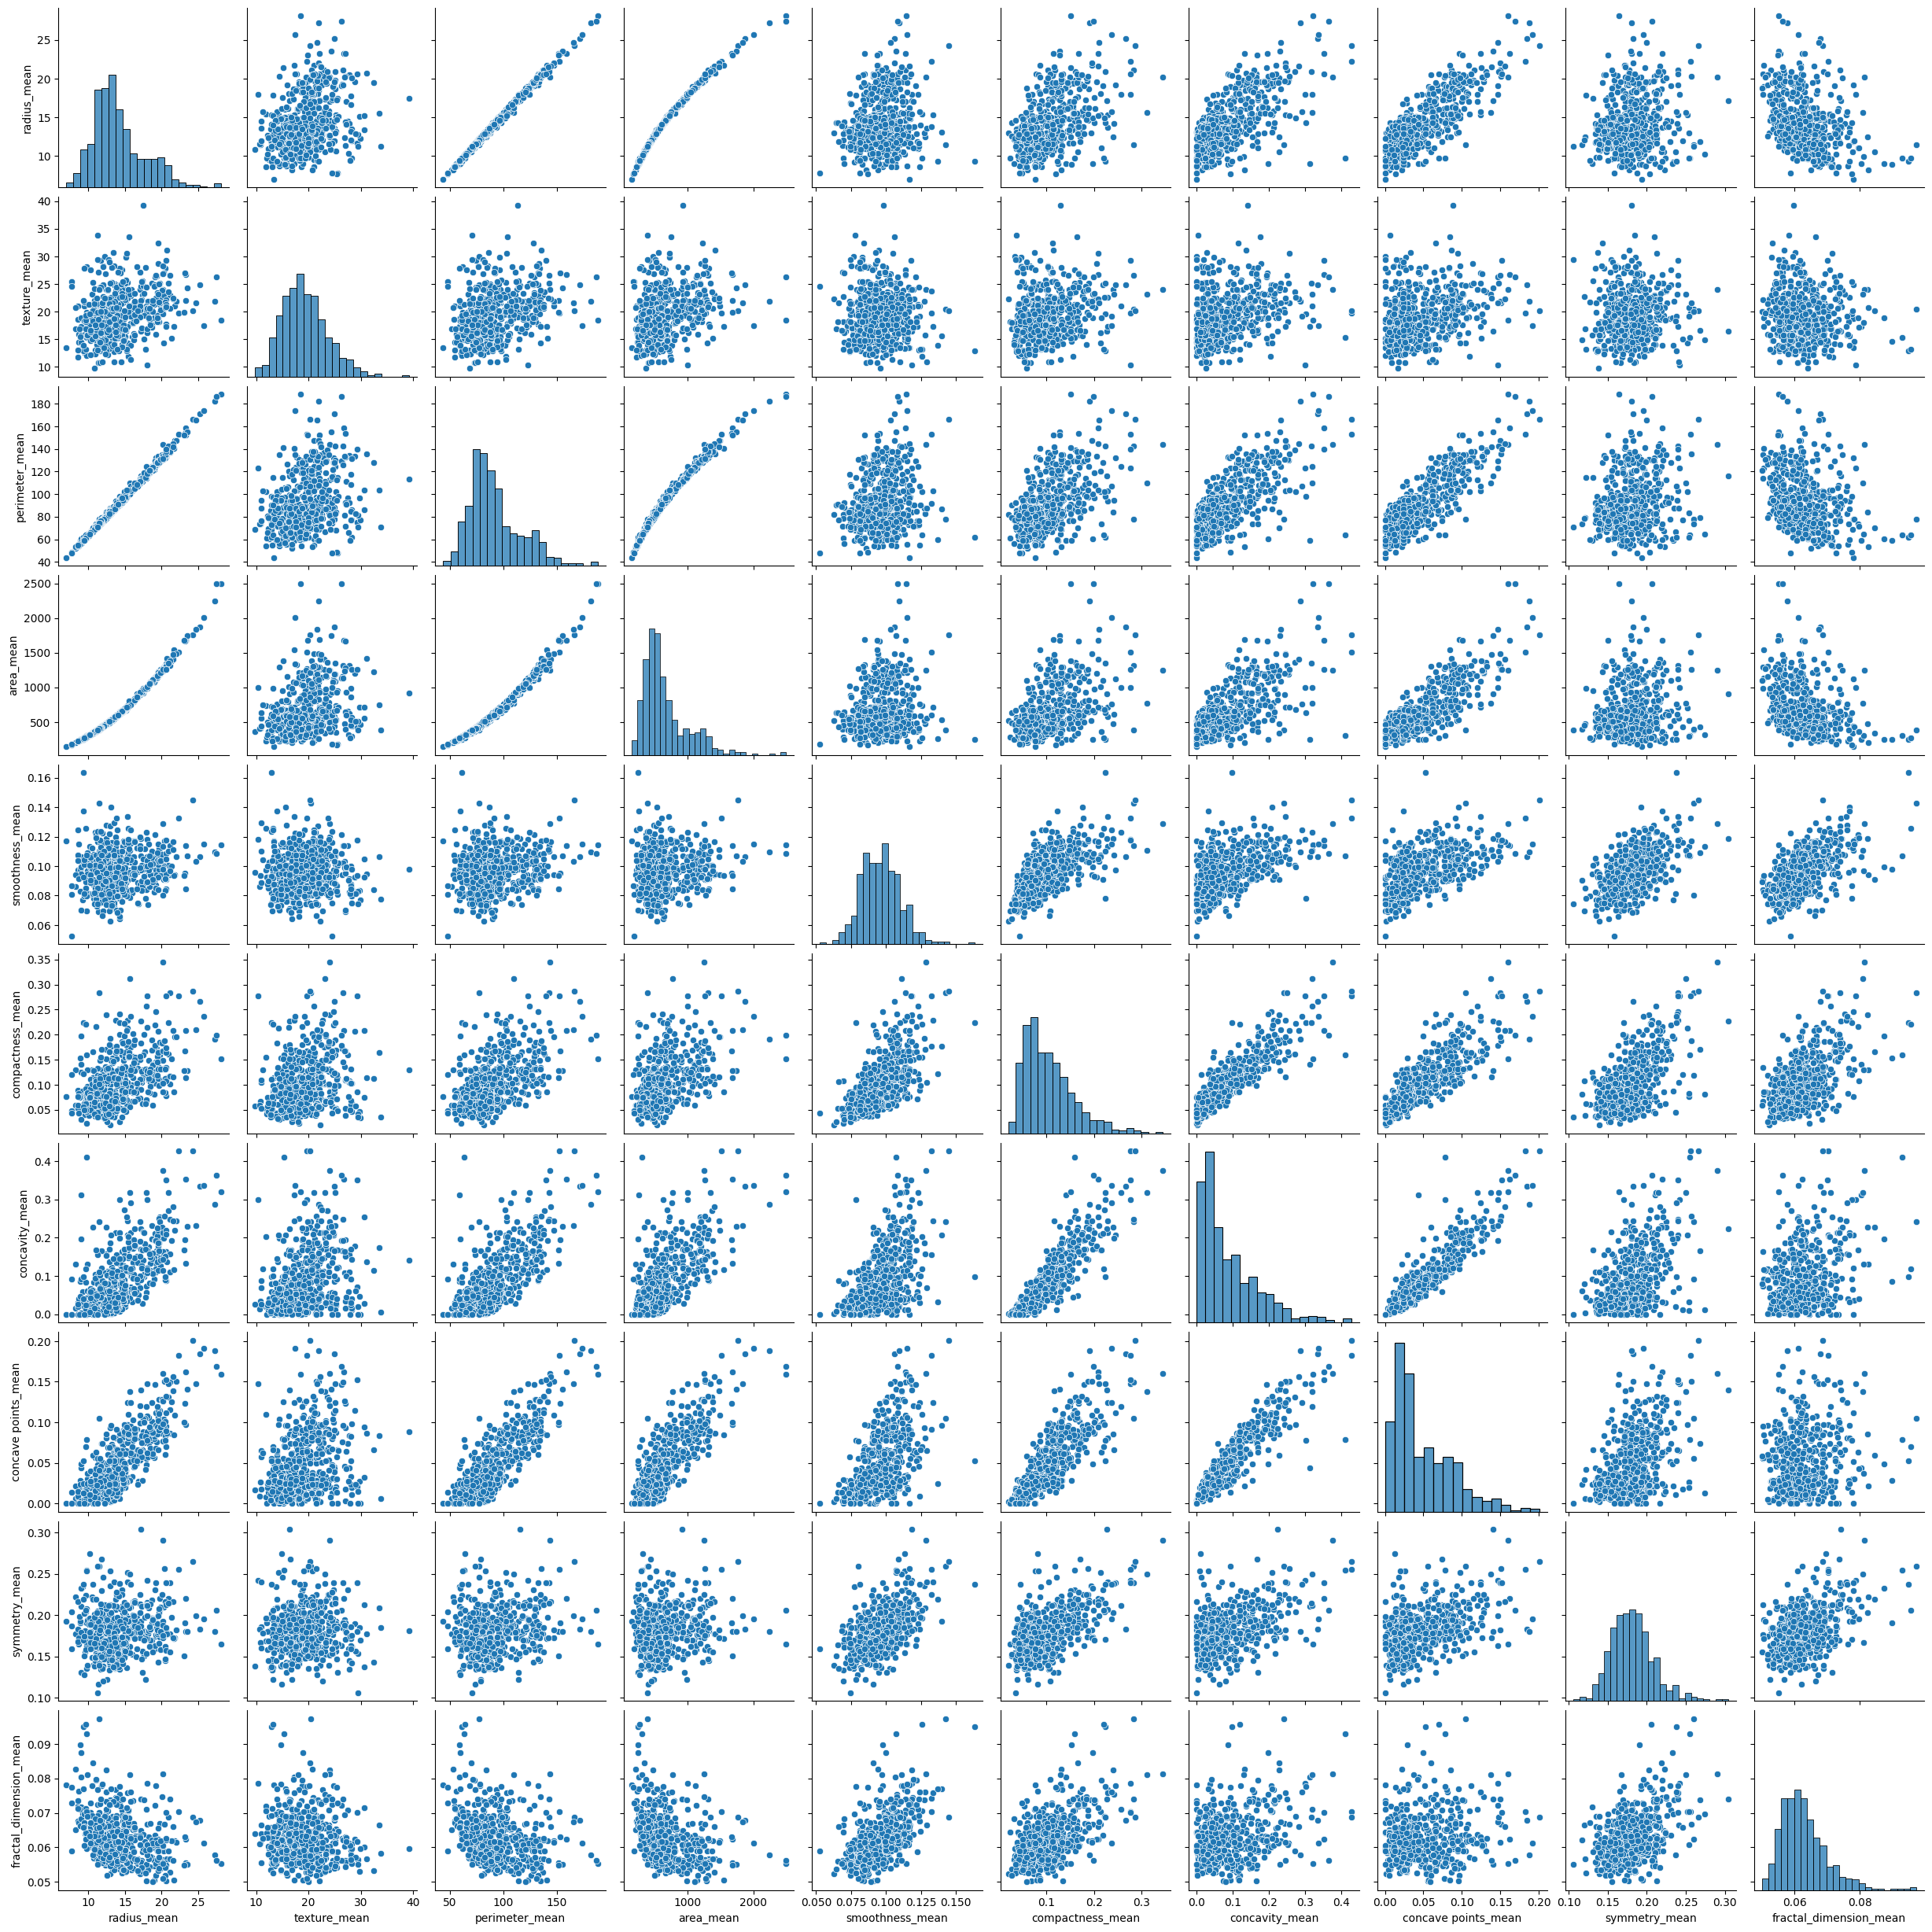

In [ ]:
mean_cols = list(data_df.filter(regex='_mean'))
sns.pairplot(data=data_df[mean_cols])

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


<Axes: >

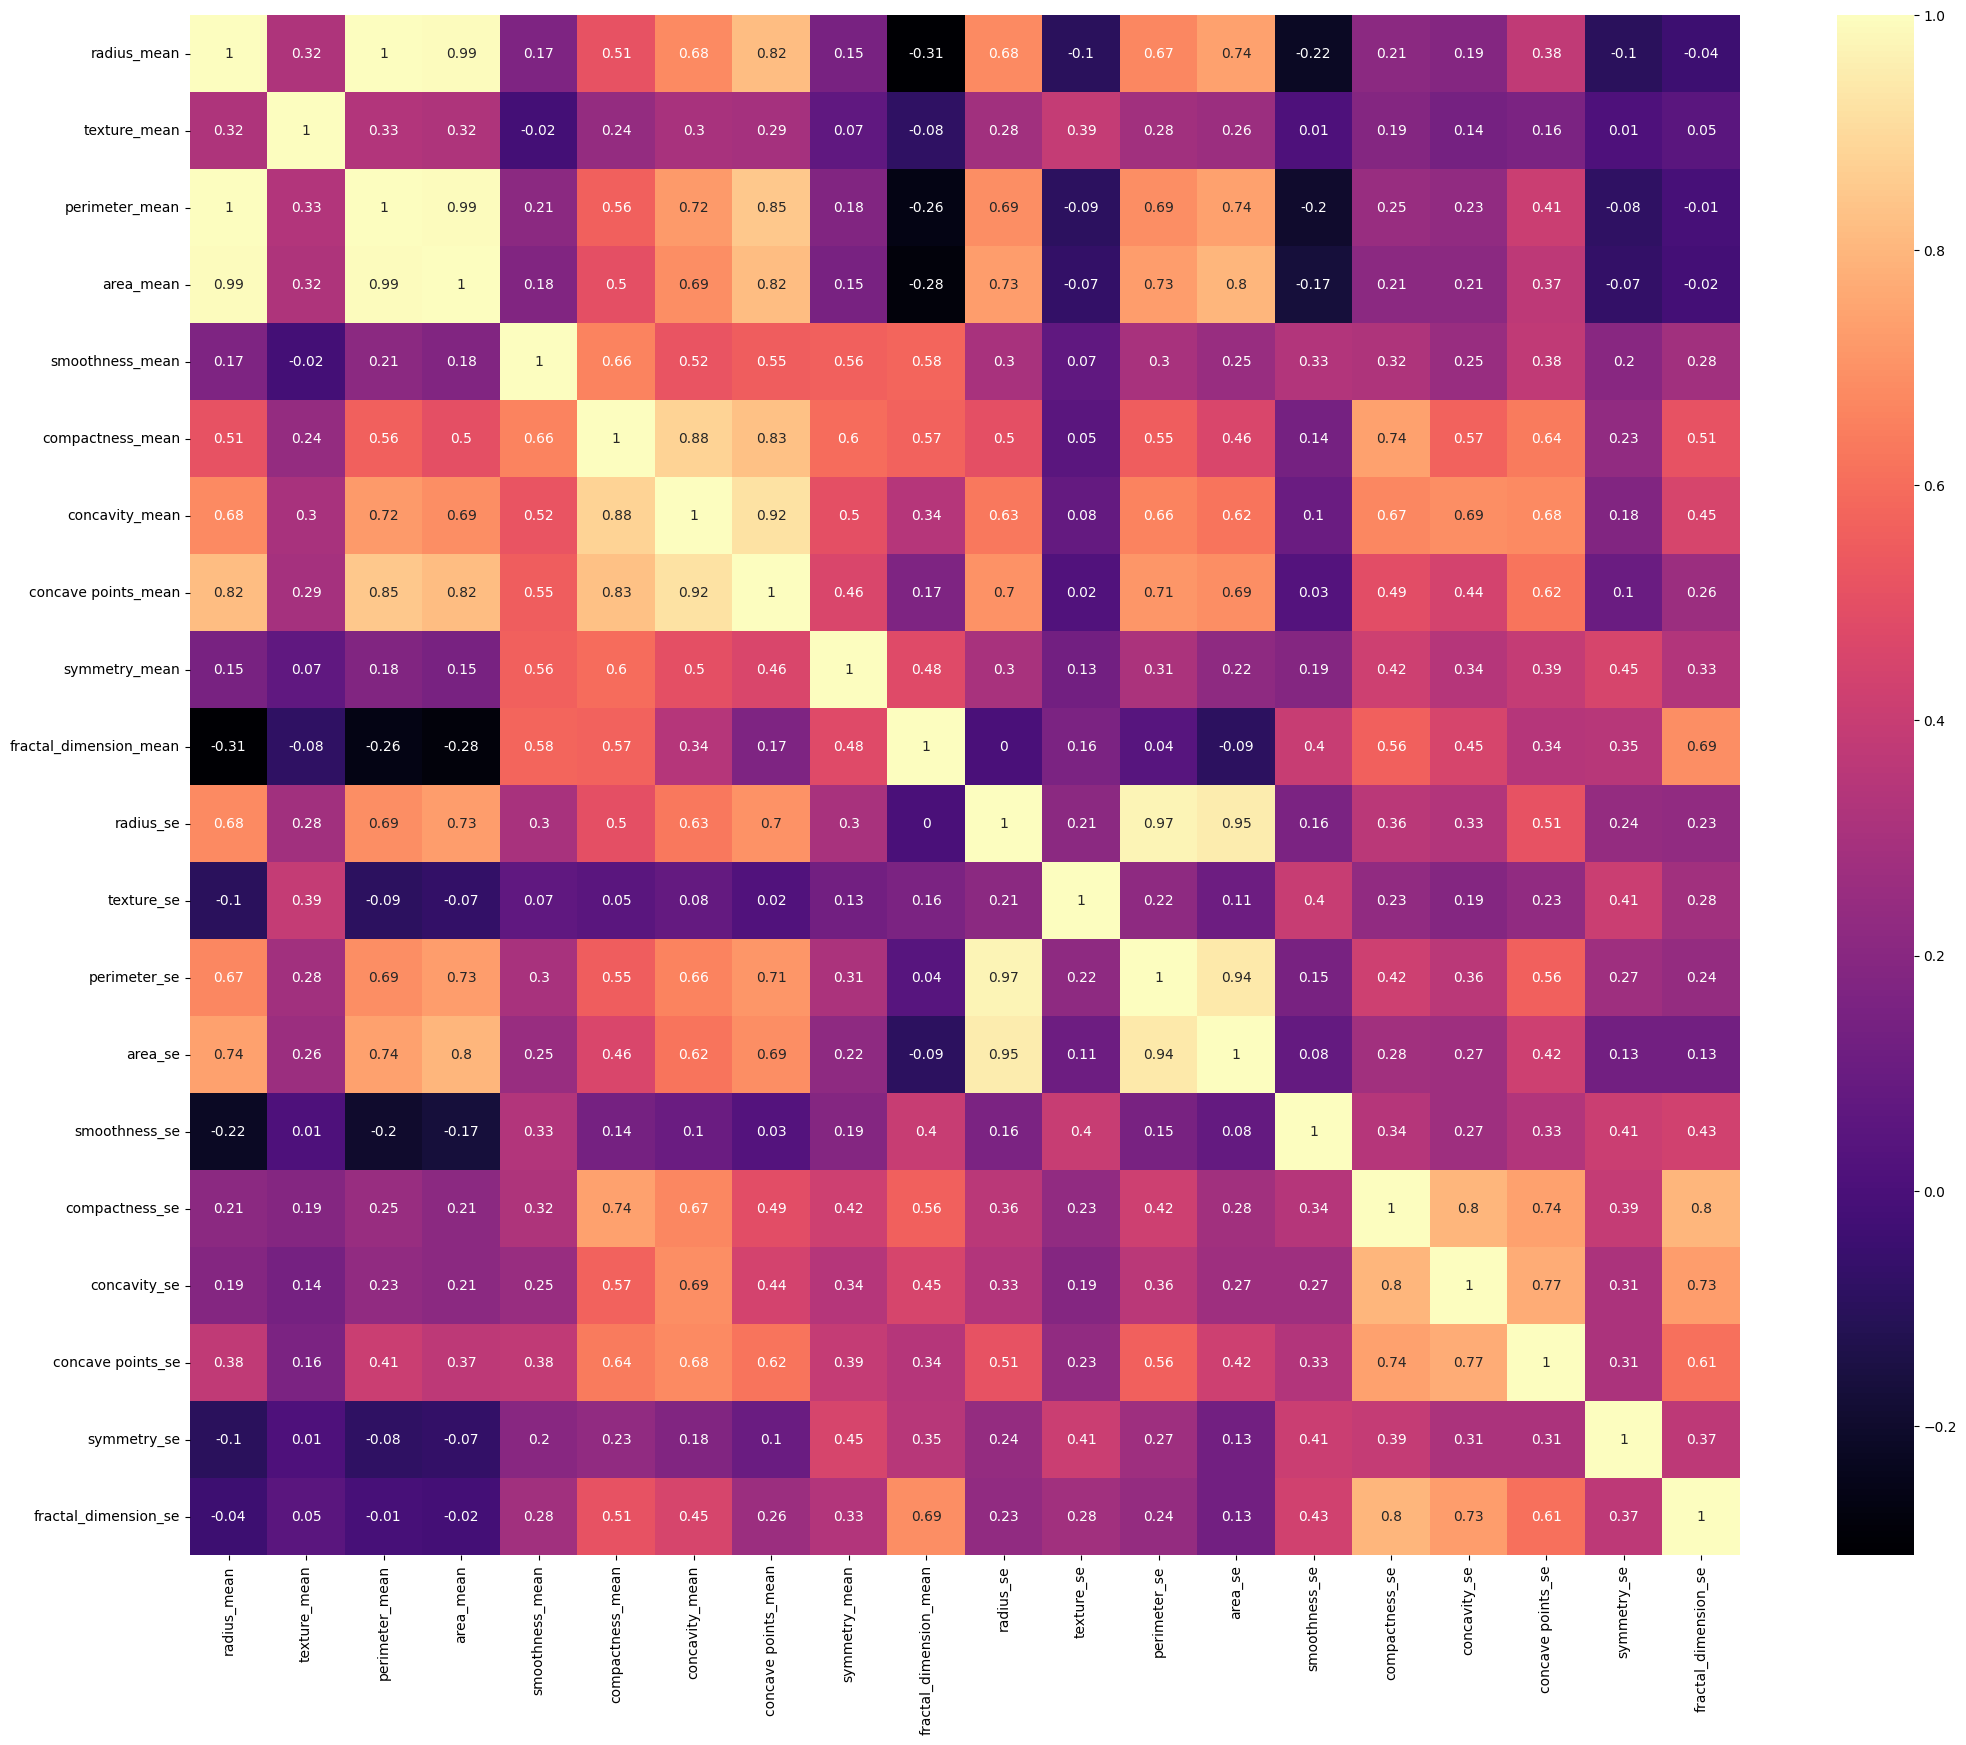

In [ ]:
plt.figure(figsize = (25, 20))
corr_df = round(data_df.select_dtypes(include=['number']).corr(method='pearson', numeric_only=True), 2)
sns.heatmap(corr_df, annot=True, cmap='magma')

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [ ]:
corr_cols = ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'concave points_se']
data_df.drop(corr_cols, axis=1, inplace=True)
data_df

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,
842302,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
842517,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
84300903,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
84348301,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
84358402,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.004239
926682,M,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.002498
926954,M,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.003892


Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'center': 'fractal_dimension_se'}>]], dtype=object)

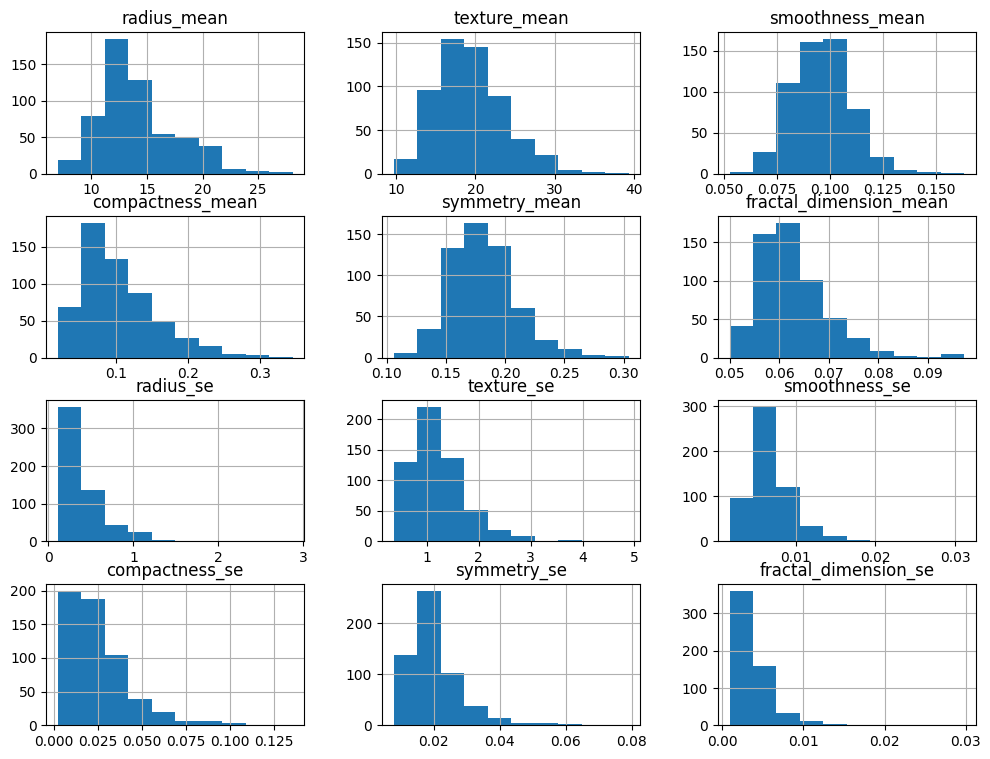

In [ ]:
data_df.hist(figsize=(12,9), bins=10)

In [ ]:
skew = data_df.select_dtypes(exclude='object').skew()
skew_cols = skew[skew > 1].index.to_list()
skew_cols

['compactness_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'symmetry_se',
 'fractal_dimension_se']

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


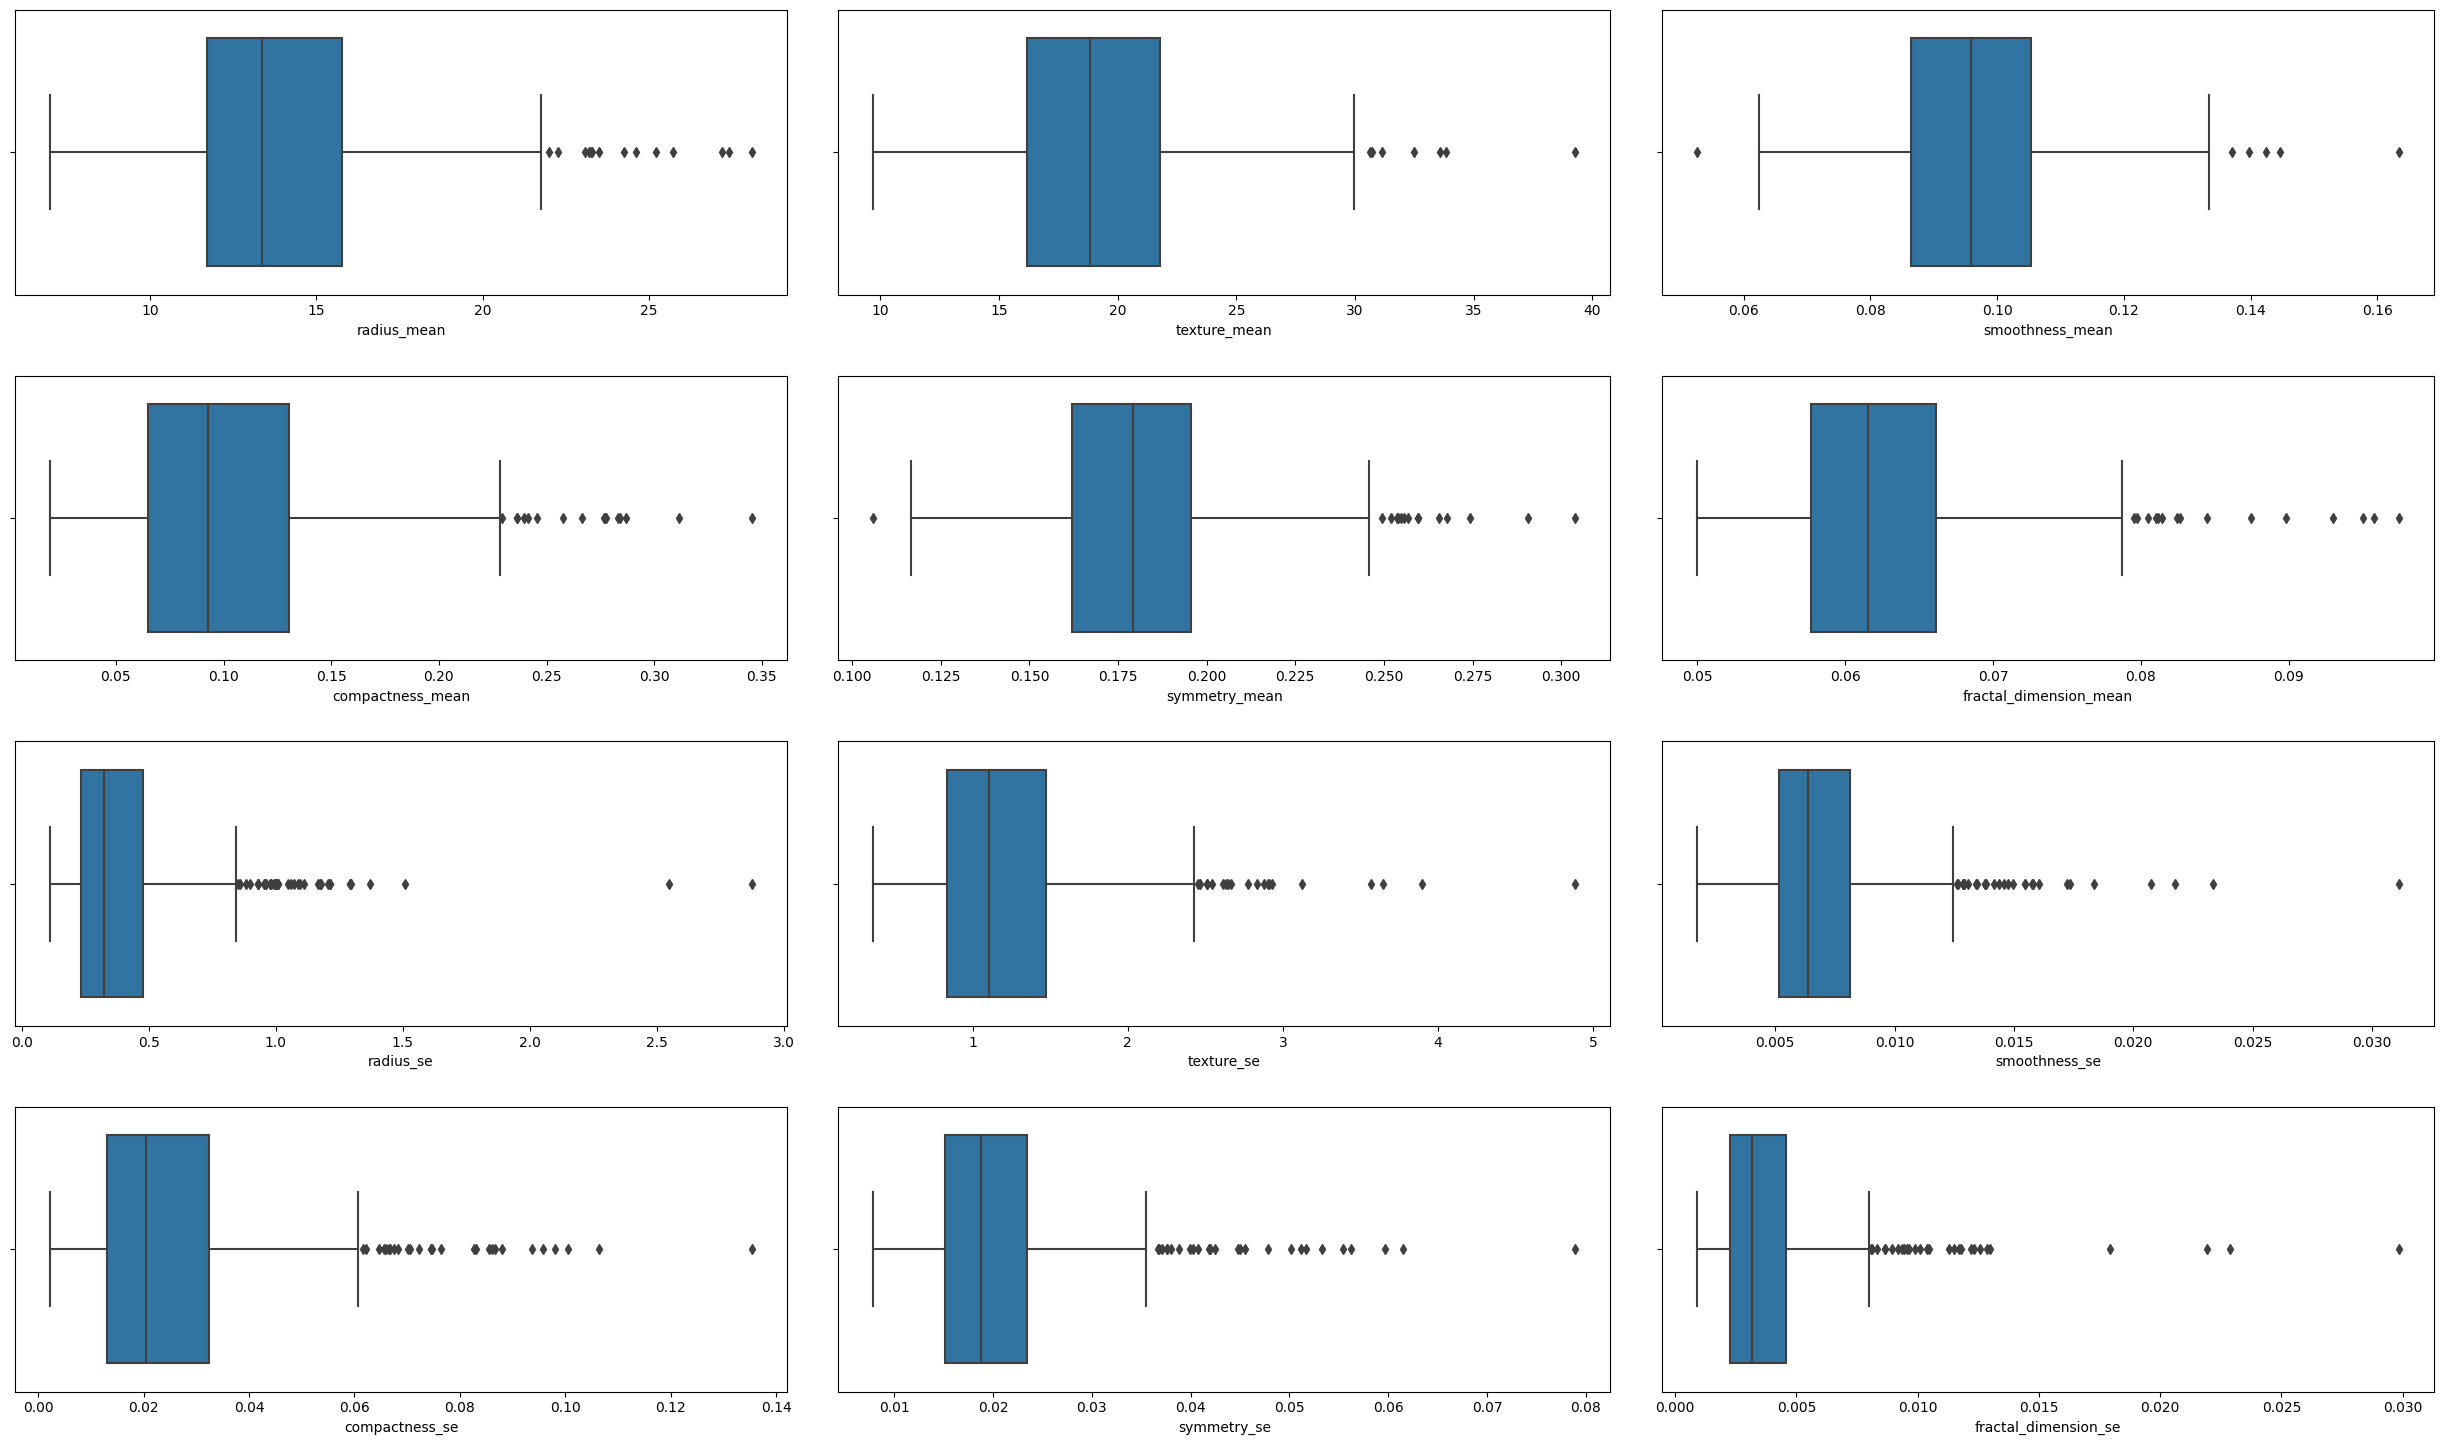

In [ ]:
numeric_cols = data_df.select_dtypes(exclude=['object']).columns
fig, axes = plt.subplots(4, 3, figsize=(25, 15))
axes = axes.ravel()
for col, ax in zip(numeric_cols, axes):
    sns.boxplot(data_df, x=col, ax=ax)
fig.tight_layout(pad=2.7)

In [ ]:
min, max = data_df.select_dtypes(exclude='object').min(), data_df.select_dtypes(exclude='object').max()

nonerval_min_cols = min.loc[(min <= 0) | (min >= 1)].index
nonerval_max_cols = max.loc[(max <= 0) | (max >= 1)].index

scale_cols = list(set(nonerval_max_cols).union(set(nonerval_min_cols)))
scale_cols

['texture_mean', 'texture_se', 'radius_mean', 'radius_se']

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [ ]:
data_df = pd.read_csv('cancer_breast.csv', index_col='id')
X = data_df.drop(['diagnosis'], axis=1)
y = data_df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
type(X_train), type(X_test), type(y_train), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [ ]:
deleted_cols = corr_cols + worst_cols
preprocessing = ColumnTransformer(transformers=[('dropcols', 'drop', deleted_cols)], remainder='passthrough')
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('dropcols', 'drop',
                                 ['perimeter_mean', 'area_mean',
                                  'concavity_mean', 'concave points_mean',
                                  'perimeter_se', 'area_se', 'concavity_se',
                                  'concave points_se', 'radius_worst',
                                  'texture_worst', 'perimeter_worst',
                                  'area_worst', 'smoothness_worst',
                                  'compactness_worst', 'concavity_worst',
                                  'concave points_worst', 'symmetry_worst',
                                  'fractal_dimension_worst'])])

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [ ]:
logr_model = make_pipeline(preprocessing, LogisticRegression(max_iter=200))
logr_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dropcols', 'drop',
                                                  ['perimeter_mean',
                                                   'area_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'perimeter_se', 'area_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst'])])),
                ('logisticregression', LogisticRegression(max_iter=200))])

In [ ]:
def fit_pred(X_train, y_train, X_test, y_test, pipeline):
    y_train_int = (y_train == 'M').astype(int)
    y_test_int = (y_test == 'M').astype(int)

    # Entrenamiento del modelo
    model = pipeline.fit(X_train, y_train_int)

    # Predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Cálculo de métricas
    rmse = mean_squared_error(y_test_int, y_pred, squared=False)
    r2 = r2_score(y_test_int, y_pred)

    print(f"RMSE es: {rmse} \n  r2: {r2}")

    print(f'Precision score: ', precision_score(y_test_int, y_pred))
    print(f'Recall: ', recall_score(y_test_int, y_pred))
    print(f'Accuracy: ', accuracy_score(y_test_int, y_pred))

    return model, confusion_matrix(y_test_int, y_pred)

In [ ]:
logr_model, conf_matrix = fit_pred(X_train, y_train, X_test, y_test, logr_model)

RMSE es: 0.3504383220252312 
  r2: 0.4722222222222221
Precision score:  0.8888888888888888
Recall:  0.7619047619047619
Accuracy:  0.8771929824561403


<Axes: >

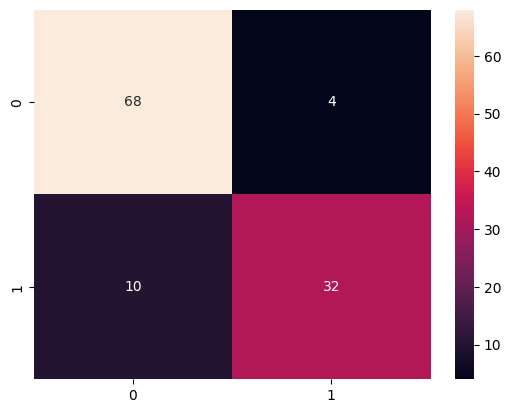

In [ ]:
sns.heatmap(conf_matrix, annot=True)

Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [ ]:
preprocessing2 = ColumnTransformer(transformers=[
    ('dropcols', 'drop', deleted_cols),
    ('sqrt', FunctionTransformer(np.sqrt), skew_cols),
    ('minmax', MinMaxScaler(), scale_cols)], remainder='passthrough')

preprocessing2

ColumnTransformer(remainder='passthrough',
                  transformers=[('dropcols', 'drop',
                                 ['perimeter_mean', 'area_mean',
                                  'concavity_mean', 'concave points_mean',
                                  'perimeter_se', 'area_se', 'concavity_se',
                                  'concave points_se', 'radius_worst',
                                  'texture_worst', 'perimeter_worst',
                                  'area_worst', 'smoothness_worst',
                                  'compactness_worst', 'concavity_worst',
                                  'concave points_worst', 'symmetry_worst',
                                  'fractal_dimension_worst']),
                                ('sqrt',
                                 FunctionTransformer(func=<ufunc 'sqrt'>),
                                 ['compactness_mean', 'fractal_dimension_mean',
                                  'radius_se', 'texture_se', 'smoothness_se',
                                  'compactness_se', 'symmetry_se',
                                  'fractal_dimension_se']),
                                ('minmax', MinMaxScaler(),
                                 ['texture_mean', 'texture_se', 'radius_mean',
                                  'radius_se'])])

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [ ]:
logr_model2 = make_pipeline(preprocessing2, LogisticRegression(max_iter=200))
logr_model2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dropcols', 'drop',
                                                  ['perimeter_mean',
                                                   'area_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'perimeter_se', 'area_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity...
                                                   'fractal_dimension_worst']),
                                                 ('sqrt',
                                                  FunctionTransformer(func=<ufunc 'sqrt'>),
                                                  ['compactness_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'smoothness_se',
                                                   'compactness_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['texture_mean', 'texture_se',
                                                   'radius_mean',
                                                   'radius_se'])])),
                ('logisticregression', LogisticRegression(max_iter=200))])

In [ ]:
model, _ = fit_pred(X_train, y_train, X_test, y_test, logr_model2)

RMSE es: 0.31063037209869776 
  r2: 0.5853174603174602
Precision score:  1.0
Recall:  0.7380952380952381
Accuracy:  0.9035087719298246


# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [ ]:
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X_scaled)

num_components = pca.n_components_

num_components

17

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [ ]:
# Verificar si la columna 'id' está en el DataFrame y eliminarla si existe
if 'id' in data_df.columns:
    X = data_df.drop(['id', 'diagnosis'], axis=1)
else:
    X = data_df.drop(['diagnosis'], axis=1)

# La columna 'diagnosis' es la variable objetivo
y = data_df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Escalar los datos y aplicar PCA para determinar el número de componentes que explican el 99% de la varianza
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X_scaled)

num_components = pca.n_components_

# Construir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=num_components)),
    ('logistic_regression', LogisticRegression())
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("ROC AUC:", roc_auc)


Accuracy: 0.9883040935672515
Recall: 0.9841269841269841
Precision: 0.9841269841269841
ROC AUC: 0.9979423868312758


10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

** ¿Cuál consideras que es la métrica más importante? **

Enlistamos las metricas de acuerdo a la prioridad:
*  Recall (Sensibilidad): Esta métrica es crucial en muchos contextos médicos porque mide la proporción de casos positivos reales que el modelo identifica correctamente
*  Precision (Precisión): Aunque también es importante, en un contexto médico, a menudo se prioriza el recall sobre la precision. Una baja precision implica un mayor número de falsos positivos, lo que puede llevar a pruebas adicionales y ansiedad para los pacientes, pero generalmente es menos crítico que perder un diagnóstico real
*  Accuracy (Exactitud): Si bien una alta exactitud general es deseable, no siempre es la métrica más importante en el diagnóstico médico. Un modelo podría tener una alta exactitud general, pero aún así fallar en detectar una proporción significativa de casos positivos reales (bajos falsos negativos).
*  ROC AUC (Área bajo la curva ROC): Esta métrica es útil para evaluar el rendimiento general del modelo, especialmente en términos de su capacidad para diferenciar entre las clases positivas y negativas bajo diferentes umbrales.


Accuracy_and_precision.svg

**¿Cómo cambiarías (disminuir/aumentar) el threshold? ¿Por qué?**

El ajuste del umbral de clasificación en un modelo de diagnóstico médico es una decisión crítica que afecta el equilibrio entre sensibilidad y especificidad:

**Disminuir el Umbral:** Hacer esto aumentaría el recall (sensibilidad), permitiendo que el modelo identifique más casos positivos a costa de un aumento en los falsos positivos.
**Aumentar el Umbral**: Hacer esto podría aumentar la precision y reducir los falsos positivos, pero también aumentaría el riesgo de falsos negativos. Esto podría ser adecuado en situaciones donde los falsos positivos conllevan un alto costo (económico, emocional o de salud).